In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Agricultura-Sonora-Cereales.xlsx')
df.head()

,ANO,CIERREYAVAN,CICLO,CDDR,NDDR,CMUN,NMUN,CVECUL,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,RENDMNTO,PMR,VALPROD,TIPO DE CLASIFICACIÓN
0,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,Agua Prieta,51,Trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80,Cereales
1,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,139,DDR 139 CABORCA,17,Caborca,51,Trigo grano,15267.0,15252.0,15.0,109935.0,7.21,1396.6,153535.22,Cereales
2,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,33,Maíz grano,39258.0,37475.0,1783.0,211524.0,5.64,1320.0,279211.68,Cereales
3,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,47,Sorgo grano,43.0,0.0,43.0,0.0,0.00,0.0,0.00,Cereales
4,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,51,Trigo grano,116200.0,116200.0,0.0,701141.0,6.03,1360.0,953551.76,Cereales


In [ ]:
df.shape

(2437, 17)

In [ ]:
df.columns

Index(['ANO', 'CIERREYAVAN', 'CICLO', 'CDDR', 'NDDR', 'CMUN', 'NMUN', 'CVECUL',
       'CULTIVO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON', 'RENDMNTO', 'PMR',
       'VALPROD', 'TIPO DE CLASIFICACIÓN'],
      dtype='object')

In [ ]:
# dropped_columns = ['CIERREYAVAN', 'NDDR', 'NMUN', 'CULTIVO', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
dropped_columns = ['ANO', 'CIERREYAVAN', 'CDDR', 'CMUN', 'CVECUL', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
df = df.drop(dropped_columns, axis=1)
df.head()

,CICLO,NDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
0,1,DDR 141 AGUA PRIETA,Agua Prieta,Trigo grano,29.0,29.0,0.0,86.0
1,1,DDR 139 CABORCA,Caborca,Trigo grano,15267.0,15252.0,15.0,109935.0
2,1,DDR 148 CAJEME,Cajeme,Maíz grano,39258.0,37475.0,1783.0,211524.0
3,1,DDR 148 CAJEME,Cajeme,Sorgo grano,43.0,0.0,43.0,0.0
4,1,DDR 148 CAJEME,Cajeme,Trigo grano,116200.0,116200.0,0.0,701141.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CICLO    2437 non-null   int64  
 1   NDDR     2437 non-null   object 
 2   NMUN     2437 non-null   object 
 3   CULTIVO  2437 non-null   object 
 4   SUPSEM   2437 non-null   float64
 5   SUPCOSE  2437 non-null   float64
 6   SUPSINI  2437 non-null   float64
 7   PRODTON  2437 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 152.4+ KB


In [ ]:
df.isna().sum()

CICLO      0
NDDR       0
NMUN       0
CULTIVO    0
SUPSEM     0
SUPCOSE    0
SUPSINI    0
PRODTON    0
dtype: int64

In [ ]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,CICLO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NDDR_DDR 140 MAGDALENA,NDDR_DDR 141 AGUA PRIETA,NDDR_DDR 142 URES,NDDR_DDR 143 MOCTEZUMA,NDDR_DDR 144 HERMOSILLO,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
0,1,29.0,29.0,0.0,86.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15267.0,15252.0,15.0,109935.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,39258.0,37475.0,1783.0,211524.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,43.0,0.0,43.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,116200.0,116200.0,0.0,701141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['CICLO'].unique()

array([1, 2])

### Pasar el '2' a '0'

In [ ]:
mapping = {2: 0}
df['CICLO'] = df['CICLO'].replace(mapping)
df['CICLO'].unique()

array([1, 0])

In [ ]:
df.head()

,CICLO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NDDR_DDR 140 MAGDALENA,NDDR_DDR 141 AGUA PRIETA,NDDR_DDR 142 URES,NDDR_DDR 143 MOCTEZUMA,NDDR_DDR 144 HERMOSILLO,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
0,1,29.0,29.0,0.0,86.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15267.0,15252.0,15.0,109935.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,39258.0,37475.0,1783.0,211524.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,43.0,0.0,43.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,116200.0,116200.0,0.0,701141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


                                CICLO    SUPSEM   SUPCOSE   SUPSINI   PRODTON  \
CICLO                        1.000000  0.262885  0.262333  0.021943  0.285695   
SUPSEM                       0.262885  1.000000  0.999265  0.047825  0.984921   
SUPCOSE                      0.262333  0.999265  1.000000  0.009501  0.986042   
SUPSINI                      0.021943  0.047825  0.009501  1.000000 -0.000975   
PRODTON                      0.285695  0.984921  0.986042 -0.000975  1.000000   
...                               ...       ...       ...       ...       ...   
CULTIVO_Sorgo escobero      -0.012665 -0.013975 -0.013758 -0.006061 -0.012911   
CULTIVO_Sorgo grano         -0.342102 -0.107596 -0.109171  0.037958 -0.134936   
CULTIVO_Trigo grano          0.691385  0.340209  0.342732 -0.055973  0.347541   
CULTIVO_Trigo grano semilla  0.134419 -0.024867 -0.024313 -0.015147 -0.023913   
CULTIVO_Triticale grano      0.107968 -0.028541 -0.028144 -0.011169 -0.027763   

                           

<Axes: >

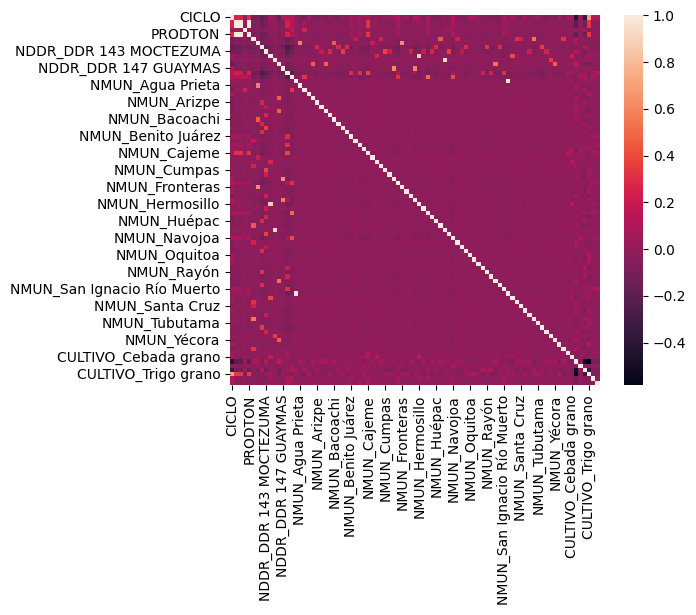

In [ ]:
# Matriz de correlacion
cormat = df.corr()

print(cormat)

# Grafica de correlacion
sns.heatmap(cormat, vmax=1, square=True)

# Implementar Regresión lineal

In [ ]:
X = df.drop('PRODTON', axis=1)
X.shape


(2437, 86)

In [ ]:
y = df['PRODTON']
y.shape

(2437,)

In [ ]:
# Conjunto de entrenamiento y prueba a razón de 70:30 (Train:Test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
# Normalizar los datos

# importar la libreria StandarScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
RLM = LinearRegression()
RLM.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
RLM = LinearRegression()
RLM.fit(X_train, y_train)
# Predicciones del modelo de regresion para los conjuntos de entrenamiento y prueba
y_train_pred = RLM.predict(X_train)
y_test_pred = RLM.predict(X_test)

# Importar metricas porque las normales solo aplican para el conjunto de prueba.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Analizamos el modelo de regresion lineal
print('Puntaje de entrenamiento con R2', r2_score(y_train, y_train_pred))
print('Puntaje de prueba con R2', r2_score(y_test, y_test_pred))

Puntaje de entrenamiento con R2 0.9796173843676846
Puntaje de prueba con R2 -7.834216448559547e+22


In [ ]:
print('Puntaje de entrenamiento con MSE', mean_squared_error(y_train, y_train_pred))
print('Puntaje de prueba con MSE', mean_squared_error(y_test, y_test_pred))

Puntaje de entrenamiento con MSE 97330478.08783525
Puntaje de prueba con MSE 1.72593446224601e+32


In [ ]:
#   Lasso Regularization = L1,
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=1000, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, tol=0.1)

In [ ]:
print('L1 Score in test = {} \n \n L1 Score in train = {}'.format(lasso_reg.score(X_test, y_test), lasso_reg.score(X_train, y_train)))

L1 Score in test = 0.7295333609706695 
 
 L1 Score in train = 0.9704992073624398


In [ ]:
#   Ridge Regularization = L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=1000, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=1000, tol=0.1)

In [ ]:
print('L2 Score in test = {} \n \n L2 Score in train = {}'.format(ridge_reg.score(X_test, y_test), ridge_reg.score(X_train, y_train)))

L2 Score in test = 0.7621045450173942 
 
 L2 Score in train = 0.9793261722858109


In [ ]:
# Importar ElasticNet
from sklearn.linear_model import ElasticNet

# Definir el modelo ElasticNet con parámetros alpha y l1_ratio
# alpha controla la cantidad de regularización
# l1_ratio controla la mezcla entre L1 y L2 (0 = solo L2, 1 = solo L1, valores entre 0 y 1 = combinación de L1 y L2)
elastic_net_reg = ElasticNet(alpha=50, l1_ratio=0.5, max_iter=100, tol=0.1)

# Ajustar el modelo a los datos
elastic_net_reg.fit(X_train, y_train)

print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_test, y_test), elastic_net_reg.score(X_train, y_train)))

Elastic Net Score in test = 0.23132139485716186 
 
 Elastic Net Score in train = 0.17190044872227384


## OLS

In [ ]:
X = df.drop('PRODTON', axis=1)
X.shape


(2437, 86)

In [ ]:
y = df['PRODTON']
y.shape

(2437,)

In [ ]:
import statsmodels.api as sm
OLS = sm.OLS(y, X).fit()

In [ ]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                PRODTON   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1314.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        04:55:58   Log-Likelihood:                -25761.
No. Observations:                2437   AIC:                         5.168e+04
Df Residuals:                    2357   BIC:                         5.215e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
CICL

In [ ]:
# Recorre los coeficientes del modelo y selecciona las variables con un valor p inferior a 0.05.
coeficientes = OLS.params
coeficientes

CICLO                          4707.062195
SUPSEM                         2956.958510
SUPCOSE                       -2950.979659
SUPSINI                       -2956.914433
NDDR_DDR 140 MAGDALENA        -8016.920532
                                  ...     
CULTIVO_Sorgo escobero         9055.033181
CULTIVO_Sorgo grano            5828.789226
CULTIVO_Trigo grano            5697.240215
CULTIVO_Trigo grano semilla    3110.089507
CULTIVO_Triticale grano         939.980285
Length: 86, dtype: float64

In [ ]:
coeficientes_filtrados = []
for value in coeficientes:
  if value <0.05:
    coeficientes_filtrados.append(value)

print(coeficientes_filtrados)

[-2950.979659003333, -2956.9144330928175, -8016.920531763098, -7585.2863671746345, -8646.50231389328, -8639.82603598692, -7208.918320968851, -6369.138588776917, -7785.132106064724, -8711.936190108952, -7880.679655748171, -10357.243201342664, -2378.7101091836066, -1528.1219288234436, -25390.09812596423, -9502.171228084224, -1547.453611542035, -601.8644446733178, -1528.0520738695748, -1020.4678263106973, -1852.1253371863702, -903.0762931124351, -1025.373562669663, -8394.34311182402, -1622.9469692107768, -2366.206246557705, -1335.8093954543722, -1149.303581858768, -1269.8221551632487, -2598.1086790162362, -2582.09213195395, -10751.406585194867, -166.5851482835264, -2351.261587187366, -1537.5928293186373, -770.9545088493718, -240.42221163463418, -1068.480489366872, -3607.9457554728224, -1013.0112866948971, -1522.357880176856, -1204.5695389191103, -689.3947223643561, -10203.082233587194, -10257.670950472024, -9327.737980637528, -4861.779506854109, -46.71511368018295, -4879.174788740569, -25

In [ ]:
variables_significativas = []
for i in range(len(OLS.params)):
  if OLS.pvalues[i] < 0.05:
    variables_significativas.append(df.columns[i])
print(variables_significativas)

['CICLO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'NMUN_Agua Prieta', 'NMUN_Caborca', 'NMUN_Plutarco Elías Calles', 'NMUN_Rayón']


In [ ]:
X_seleccionado = df[variables_significativas].values
OLS_significativo = sm.OLS(y, X_seleccionado).fit()

In [ ]:
print(OLS_significativo.summary())

                                 OLS Regression Results                                
Dep. Variable:                PRODTON   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.184e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):                        0.00
Time:                        04:55:58   Log-Likelihood:                         -26001.
No. Observations:                2437   AIC:                                  5.202e+04
Df Residuals:                    2429   BIC:                                  5.206e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
residuos = OLS_significativo.resid
suma_residuos = sum(residuos)
suma_residuos

-1950003.0171321747

# PCA
---


In [ ]:
X = df.drop('PRODTON', axis=1)
X.shape

(2437, 86)

In [ ]:
y = df['PRODTON']
y.shape

(2437,)

In [ ]:
# Normalizar los datos

# importar la libreria StandarScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA
#   Retain 95% of information, whatever features you come on with, I'm happy with that
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
print('Original columns without PCA = {}\nNew columns with PCA = {}'.format(X_scaled.shape, X_pca.shape))

Original columns without PCA = (2437, 86)
New columns with PCA = (2437, 67)


In [ ]:
pca.explained_variance_ratio_

array([0.03887441, 0.02788267, 0.02667933, 0.02478335, 0.02424637,
       0.02402992, 0.02380725, 0.02375525, 0.0234182 , 0.02333299,
       0.02237039, 0.01826232, 0.0157272 , 0.01408732, 0.01370733,
       0.01354136, 0.0129776 , 0.01249491, 0.01240732, 0.01226659,
       0.01219094, 0.01204748, 0.01195035, 0.01192343, 0.01189737,
       0.01187667, 0.01186497, 0.01185923, 0.01185627, 0.01184516,
       0.01183708, 0.01182767, 0.0118189 , 0.01180715, 0.01180138,
       0.01178334, 0.01175864, 0.0117497 , 0.01174654, 0.01174116,
       0.01173866, 0.01173638, 0.01173553, 0.01173363, 0.01172003,
       0.01171928, 0.01171926, 0.01171431, 0.01171202, 0.01170913,
       0.01170292, 0.01169881, 0.01169742, 0.01169262, 0.01168254,
       0.01167946, 0.01167273, 0.01166924, 0.0116662 , 0.01165742,
       0.01165638, 0.01164623, 0.01163757, 0.01099948, 0.01065518,
       0.01050527, 0.01028333])

In [ ]:
pca.n_components_

67

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [ ]:
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)
print('Score in test model with PCA = {}\nScore in train model with PCA = {}'.format(pca_model.score(X_test_pca, y_test_pca),pca_model.score(X_train_pca, y_train_pca)))

Score in test model with PCA = 0.8828467381052766
Score in train model with PCA = 0.9459595775310492


### prueba de regularizacion con L1

---

In [ ]:
#   Lasso Regularization = L1,
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train_pca, y_train_pca)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L1 Score in test = {} \n \n L1 Score in train = {}'.format(lasso_reg.score(X_test_pca, y_test_pca), lasso_reg.score(X_train_pca, y_train_pca)))

L1 Score in test = 0.8833853212723083 
 
 L1 Score in train = 0.9459267593676067


### Prueba de Regularizacion con l2

---


In [ ]:
#   Ridge Regularization = L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train_pca, y_train_pca)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L2 Score in test = {} \n \n L2 Score in train = {}'.format(ridge_reg.score(X_test_pca, y_test_pca), ridge_reg.score(X_train_pca, y_train_pca)))

L2 Score in test = 0.884551442384688 
 
 L2 Score in train = 0.94583695386524


In [ ]:
from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = ridge_reg.predict(X_train_pca)
y_test_pred = ridge_reg.predict(X_test_pca)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train_pca,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test_pca,
    'y_test_pred': y_test_pred
})

# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("\nComparación del conjunto de prueba:")
print(test_comparison.head())

# Calcular el error cuadrático medio para ambos conjuntos
train_mse = mean_squared_error(y_train_pca, y_train_pred)
test_mse = mean_squared_error(y_test_pca, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

Comparación del conjunto de entrenamiento:
      y_train_real  y_train_pred
1944           0.0   2063.581458
1466          25.0 -17597.791633
1903       14076.0  18050.725861
1215          85.0  -6726.662557
904           10.4  20104.214375

Comparación del conjunto de prueba:
      y_test_real   y_test_pred
1923       217.35   6968.141893
976          9.00 -21410.313012
2132      1739.16   3034.434211
1712      2088.00   4955.730936
1100       149.70  15770.647612

Error cuadrático medio en el conjunto de entrenamiento: 260092975.8764826
Error cuadrático medio en el conjunto de prueba: 247689309.82807449


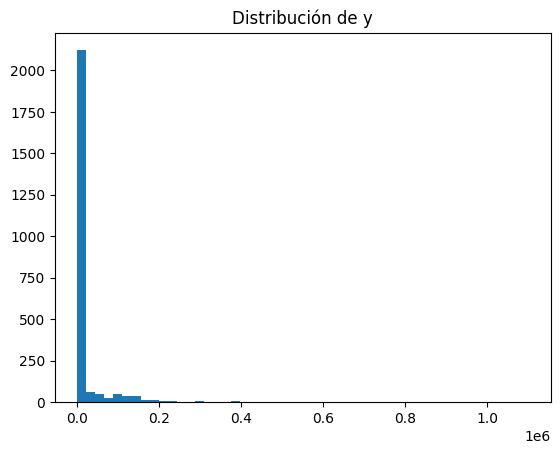

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y, bins=50)
plt.title('Distribución de y')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

ridge_selector = SelectFromModel(Ridge(alpha=50))
ridge_selector.fit(X_scaled, y)
X_selected = ridge_selector.transform(X_scaled)

print("Número de características seleccionadas:", X_selected.shape[1])


Número de características seleccionadas: 7


In [ ]:
X_selected

array([[ 1.08259607, -0.29155281, -0.28719198, ..., -0.1258568 ,
        -0.2285722 , -0.91005882],
       [ 1.08259607,  1.18466398,  1.1891958 , ..., -0.1258568 ,
        -0.2285722 , -0.91005882],
       [ 1.08259607,  3.50884806,  3.34447174, ..., -0.1258568 ,
         4.37498524,  1.09883008],
       ...,
       [-0.92370555, -0.29436225, -0.29000452, ..., -0.1258568 ,
        -0.2285722 ,  1.09883008],
       [-0.92370555, -0.29436225, -0.29000452, ..., -0.1258568 ,
        -0.2285722 , -0.91005882],
       [ 1.08259607, -0.23410455, -0.22968046, ..., -0.1258568 ,
        -0.2285722 , -0.91005882]])

In [ ]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected =train_test_split(X_selected, y, test_size=0.3, random_state=30)

In [ ]:
#   Ridge Regularization = L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train_selected, y_train_selected)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L2 Score in test = {} \n \n L2 Score in train = {}'.format(ridge_reg.score(X_test_selected, y_test_selected), ridge_reg.score(X_train_selected, y_train_selected)))

L2 Score in test = 0.9676043669321637 
 
 L2 Score in train = 0.9781377964127026


In [ ]:
# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = ridge_reg.predict(X_train_selected)
y_test_pred = ridge_reg.predict(X_test_selected)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train_selected,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test_selected,
    'y_test_pred': y_test_pred
})

# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("\nComparación del conjunto de prueba:")
print(test_comparison.head())

# Calcular el error cuadrático medio para ambos conjuntos
train_mse = mean_squared_error(y_train_selected, y_train_pred)
test_mse = mean_squared_error(y_test_selected, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

Comparación del conjunto de entrenamiento:
      y_train_real  y_train_pred
1944           0.0  -3042.314902
1466          25.0  -2979.814118
1903       14076.0  13800.247556
1215          85.0  -2836.679595
904           10.4   1631.463548

Comparación del conjunto de prueba:
      y_test_real  y_test_pred
1923       217.35  1825.348266
976          9.00   168.144167
2132      1739.16 -1385.481859
1712      2088.00   365.355894
1100       149.70  1772.470615

Error cuadrático medio en el conjunto de entrenamiento: 104983120.3379915
Error cuadrático medio en el conjunto de prueba: 69503267.61771236


In [ ]:
test_comparison.head(50)

,y_test_real,y_test_pred
1923,217.35,1825.348266
976,9.00,168.144167
2132,1739.16,-1385.481859
1712,2088.00,365.355894
1100,149.70,1772.470615
1936,0.00,1619.712959
1048,77.92,301.776804
171,35316.60,36249.747747
287,240.00,501.536817
95,2766.00,5752.635335


# En las predicciones que van a valores más altos, se observa un comportamiento bastante acercado; sin embargo, con los valores más cercanos a cero no se tiene un comportamiento lineal, por lo que a lo mejor se trata de un modelo polinomial.

----

In [ ]:
y_test_pca.info()

<class 'pandas.core.series.Series'>
Index: 732 entries, 1923 to 357
Series name: PRODTON
Non-Null Count  Dtype  
--------------  -----  
732 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [ ]:
prueba = ridge_reg.predict(X_test_pca)

ValueError: X has 67 features, but Ridge is expecting 7 features as input.

In [ ]:
pruebadf = pd.DataFrame(prueba)
pruebadf.head()

In [ ]:
pruebadf['y_test'] = y_test_pca.values

In [ ]:
pruebadf

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(ridge_reg).fit(X_train_pca, y_train_pca)
viz.score(X_test_pca, y_test_pca)
viz.poof();

# MODELO POLINOMIAL
---

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_selected)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [ ]:
X_poly.shape

In [ ]:
y.shape

In [ ]:
print('Poly Score in test = {} \n \n Poly Score in train = {}'.format(lin_reg_2.score(X_test_selected, y_test_selected), lin_reg_2.score(X_train_selected, y_train_selected)))

---



In [ ]:
# df_poly = df[['SUPCOSE', 'PRODTON']]
df_poly = df

In [ ]:
df_poly.head()

In [ ]:
df_poly.isna().sum()

In [ ]:
X = df_poly.iloc[:, 1:].values
y = df_poly['PRODTON']

In [ ]:
X.shape

In [ ]:
X

In [ ]:
y.shape

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=30)

In [ ]:
y_train

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

In [ ]:
X_poly_test = poly_reg.transform(X_test)

In [ ]:
print('Poly Score in test = {} \n \n Poly Score in train = {}'.format(lin_reg_2.score(X_poly_test, y_test), lin_reg_2.score(X_poly, y_train)))

In [ ]:
from sklearn.metrics import mean_squared_error
# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = lin_reg_2.predict(X_poly)
y_test_pred = lin_reg_2.predict(X_poly_test)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test,
    'y_test_pred': y_test_pred
})



# Calcular el error cuadrático medio para ambos conjuntos
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

### mODELO SOBREAJUSTADO

In [ ]:
y_train

In [ ]:
# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
train_comparison.head(100)



In [ ]:
print("\nComparación del conjunto de prueba:")
test_comparison.head(25)


---

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Verdad o blofeo (regresión lineal)')
plt.xlabel('Superficie Cosechada')
plt.ylabel('Produccion')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Verdad o blofeo (regresión polinomial)')
plt.xlabel('Superficie Cosechada')
plt.ylabel('Produccion')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos en X e y
# X = df[['SUPCOSE']]  # Ajusta según tus datos
# y = df['PRODTON']    # Ajusta según tus datos

# Crear un grid de gráficos de 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()  # Aplanar el array de ejes para un fácil acceso

# Iterar sobre diferentes grados de polinomios de 1 a 9
for n in range(1, 10):
    poly_reg = PolynomialFeatures(degree=n)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    # Seleccionar el eje correspondiente
    ax = axes[n-1]

    # Graficar los datos originales
    ax.scatter(X, y, color='red')

    # Graficar la predicción polinómica
    ax.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
    ax.set_title(f'Regresión Polinomial (grado {n})')
    ax.set_xlabel('Superficie Cosechada')
    ax.set_ylabel('Producción')


# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos en X e y
# X = df[['SUPCOSE']]  # Ajusta según tus datos
# y = df['PRODTON']    # Ajusta según tus datos

# Crear un grid de gráficos de 3x3 con tamaño 8x8 pulgadas
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Ajuste a 15x15 para mayor claridad
axes = axes.ravel()  # Aplanar el array de ejes para un fácil acceso

# Iterar sobre diferentes grados de polinomios de 1 a 9
for n in range(1, 10):
    poly_reg = PolynomialFeatures(degree=n)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)

    # Calcular las predicciones y el MSE
    y_pred = lin_reg_2.predict(X_poly)
    mse = mean_squared_error(y, y_pred)

    # Seleccionar el eje correspondiente
    ax = axes[n-1]

    # Graficar los datos originales
    ax.scatter(X, y, color='red')

    # Graficar la predicción polinómica
    ax.plot(X, y_pred, color='blue')
    ax.set_title(f'Regresión Polinomial (grado {n})\nMSE: {mse:.2f}')
    ax.set_xlabel('Superficie Cosechada')
    ax.set_ylabel('Producción')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


In [ ]:
lin_reg.predict([[25000]])

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[25000]]))

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
y_scaled = sc.fit_transform(y_)

In [ ]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_scaled, y)

In [ ]:
plt.scatter(X_scaled, y, color = 'red')
plt.plot(X_scaled, lin_reg.predict(X_scaled), color = 'blue')
plt.title('Verdad o blofeo (regresión lineal)')
plt.xlabel('Superficie Cosechada')
plt.ylabel('Produccion')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que df es tu DataFrame y 'PRODTON' es la variable objetivo
X = df[['SUPCOSE']].values  # Reemplaza 'OTRAS_COLUMNAS' por tus otras columnas de características
y = df['PRODTON'].values.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Escalar X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Escalar y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Crear y entrenar el modelo de regresión lineal
ridge_reg = Ridge(alpha=50, max_iter=1000, tol=0.1)
ridge_reg.fit(X_train_scaled, y_train_scaled)

# Hacer predicciones
y_train_pred_scaled = ridge_reg.predict(X_train_scaled)
y_test_pred_scaled = ridge_reg.predict(X_test_scaled)

# Desescalar las predicciones
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Evaluar el modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Error cuadrático medio en el conjunto de entrenamiento: {train_mse}')
print(f'Error cuadrático medio en el conjunto de prueba: {test_mse}')

# Comparar algunas predicciones
train_comparison = pd.DataFrame({'y_train_real': y_train.flatten(), 'y_train_pred': y_train_pred.flatten()})
test_comparison = pd.DataFrame({'y_test_real': y_test.flatten(), 'y_test_pred': y_test_pred.flatten()})

print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("Comparación del conjunto de prueba:")
print(test_comparison.head())


In [ ]:
print(test_comparison.head(50))

In [ ]:
# Crear y entrenar el modelo de regresión lineal
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train_scaled)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train_scaled)


# Hacer predicciones
y_train_pred_scaled = lin_reg_2.predict(X_train_scaled)
y_test_pred_scaled = lin_reg_2.predict(X_test_scaled)

# Desescalar las predicciones
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Evaluar el modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Error cuadrático medio en el conjunto de entrenamiento: {train_mse}')
print(f'Error cuadrático medio en el conjunto de prueba: {test_mse}')

# Comparar algunas predicciones
train_comparison = pd.DataFrame({'y_train_real': y_train.flatten(), 'y_train_pred': y_train_pred.flatten()})
test_comparison = pd.DataFrame({'y_test_real': y_test.flatten(), 'y_test_pred': y_test_pred.flatten()})

print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("Comparación del conjunto de prueba:")
print(test_comparison.head())

# Espacio para regresión polinomial porque el otro archivo se quedó pillado:(
  ---

  

In [ ]:
# Leer dataframe
df = pd.read_excel('Agricultura-Sonora-Cereales.xlsx')
df.shape

(2437, 17)

In [ ]:
# Eliminar columnas que no son de interés
dropped_columns = ['ANO', 'CIERREYAVAN', 'CDDR', 'CMUN', 'CVECUL', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
df = df.drop(dropped_columns, axis=1)
df.head()

,CICLO,NDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
0,1,DDR 141 AGUA PRIETA,Agua Prieta,Trigo grano,29.0,29.0,0.0,86.0
1,1,DDR 139 CABORCA,Caborca,Trigo grano,15267.0,15252.0,15.0,109935.0
2,1,DDR 148 CAJEME,Cajeme,Maíz grano,39258.0,37475.0,1783.0,211524.0
3,1,DDR 148 CAJEME,Cajeme,Sorgo grano,43.0,0.0,43.0,0.0
4,1,DDR 148 CAJEME,Cajeme,Trigo grano,116200.0,116200.0,0.0,701141.0


In [ ]:
# Obtener dummies de las variables categoricas
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head(20)

,CICLO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NDDR_DDR 140 MAGDALENA,NDDR_DDR 141 AGUA PRIETA,NDDR_DDR 142 URES,NDDR_DDR 143 MOCTEZUMA,NDDR_DDR 144 HERMOSILLO,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
0,1,29.0,29.0,0.0,86.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,15267.0,15252.0,15.0,109935.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,39258.0,37475.0,1783.0,211524.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,43.0,0.0,43.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,116200.0,116200.0,0.0,701141.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,299.0,291.0,8.0,1310.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,146.0,0.0,146.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,1,2971.0,2971.0,0.0,16369.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,1180.0,1180.0,0.0,4130.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,1,19640.0,19640.0,0.0,125696.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['CICLO'].unique()

array([1, 2])

In [ ]:
# Convertir los valores con valor '2' a '0' para hacerla binaria
mapping = {2: 0}
df['CICLO'] = df['CICLO'].replace(mapping)
df['CICLO'].unique()

array([1, 0])

<Axes: >

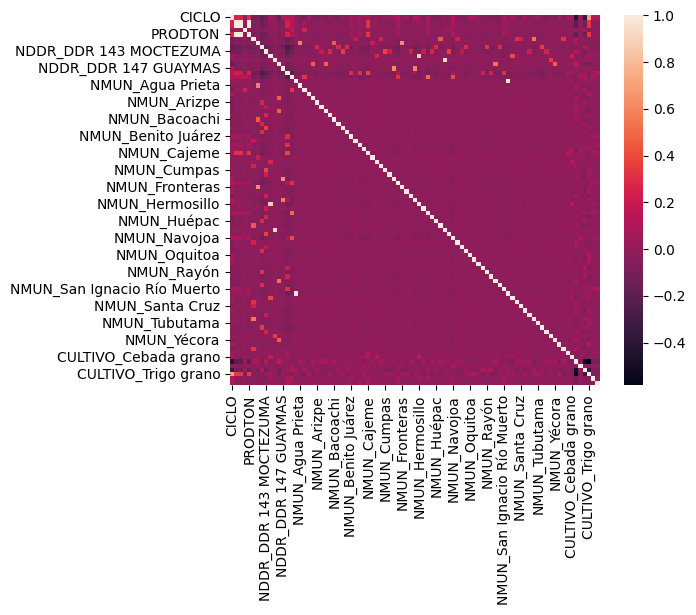

In [ ]:
# Matriz de correlacion
cormat = df.corr()

# Grafica de correlacion
sns.heatmap(cormat, vmax=1, square=True)

In [ ]:
df_poly = df

In [ ]:
X = df_poly.drop('PRODTON', axis=1)
X.shape

(2437, 86)

In [ ]:
# Division de entrenamiento y prueba, 70 y 30% respectivamente
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=30)

In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Definición de la regresión polinomial, en este caso es de grado 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)

In [ ]:
# Definción del conjunto de prueba para el modelo polinomial
X_poly_test = poly_reg.transform(X_test)

In [ ]:
# Implementación de la regresión polinomial a una regresión lineal
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Revisar el score de ambos conjuntos
print('Poly R2 Score in test = {} \n \n Poly R2 Score in train = {}'.format(lin_reg_2.score(X_poly_test, y_test), lin_reg_2.score(X_poly, y_train)))

Poly R2 Score in test = -1.1070491934769704e+16 
 
 Poly R2 Score in train = 0.994406010786629


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = lin_reg_2.predict(X_poly)
y_test_pred = lin_reg_2.predict(X_poly_test)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test,
    'y_test_pred': y_test_pred
})

# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("\nComparación del conjunto de prueba:")
print(test_comparison.head())

# Calcular el mse para ambos conjuntos
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

# Calcular r2 para ambos conjuntos
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nR2 en el conjunto de entrenamiento:", train_r2)
print("R2 en el conjunto de prueba:", test_r2)

Comparación del conjunto de entrenamiento:
      y_train_real  y_train_pred
1944           0.0    -56.878662
1466          25.0     12.945801
1903       14076.0  14445.732178
1215          85.0     73.963867
904           10.4      3.009033

Comparación del conjunto de prueba:
      y_test_real  y_test_pred
1923       217.35   173.405273
976          9.00     3.820557
2132      1739.16  1622.206299
1712      2088.00  2956.732666
1100       149.70   132.838135

Error cuadrático medio en el conjunto de entrenamiento: 26862545.69040649
Error cuadrático medio en el conjunto de prueba: 2.3751206281131524e+25

R2 en el conjunto de entrenamiento: 0.994406010786629
R2 en el conjunto de prueba: -1.1070491934769704e+16


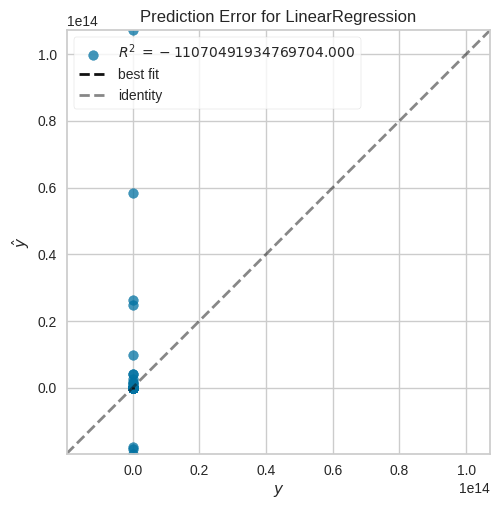

In [ ]:
from yellowbrick.regressor import PredictionError
viz = PredictionError(lin_reg_2).fit(X_poly, y_train)
viz.score(X_poly_test, y_test)
viz.show();

In [ ]:
#   Lasso Regularization = L1,
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_poly, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L1 Score in test = {} \n \n L1 Score in train = {}'.format(lasso_reg.score(X_poly_test, y_test), lasso_reg.score(X_poly, y_train)))

L1 Score in test = 0.9796365396980798 
 
 L1 Score in train = 0.9897046984237929


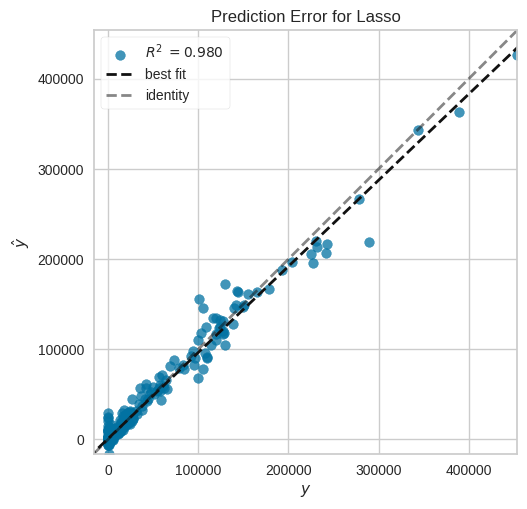

In [ ]:
viz = PredictionError(lasso_reg).fit(X_poly, y_train)
viz.score(X_poly_test, y_test)
viz.show();

In [ ]:
#   Ridge Regularization = L2
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_poly, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print('L2 Score in test = {} \n \n L2 Score in train = {}'.format(ridge_reg.score(X_poly_test, y_test), ridge_reg.score(X_poly, y_train)))

L2 Score in test = 0.9139968367586422 
 
 L2 Score in train = 0.9934696428344654


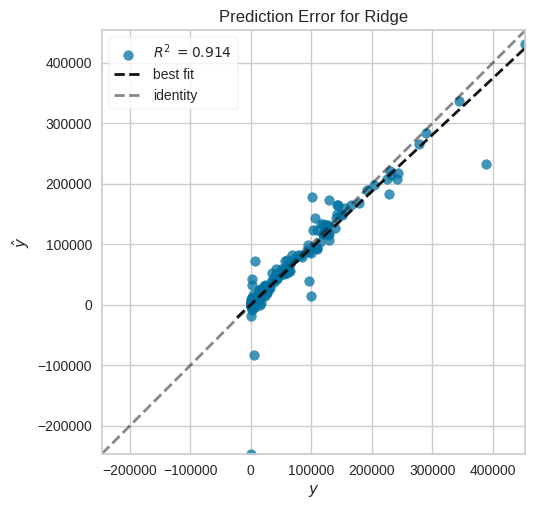

In [ ]:
viz = PredictionError(ridge_reg).fit(X_poly, y_train)
viz.score(X_poly_test, y_test)
viz.show();

##  Predicciones con L1

In [ ]:
# Hacer predicciones en el conjunto de entrenamiento y de prueba
y_train_pred = lasso_reg.predict(X_poly)
y_test_pred = lasso_reg.predict(X_poly_test)

# Crear DataFrame comparativo para el conjunto de entrenamiento
train_comparison = pd.DataFrame({
    'y_train_real': y_train,
    'y_train_pred': y_train_pred
})

# Crear DataFrame comparativo para el conjunto de prueba
test_comparison = pd.DataFrame({
    'y_test_real': y_test,
    'y_test_pred': y_test_pred
})

# Mostrar las primeras filas de las comparaciones
print("Comparación del conjunto de entrenamiento:")
print(train_comparison.head())

print("\nComparación del conjunto de prueba:")
print(test_comparison.head())

# Calcular el mse para ambos conjuntos
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nError cuadrático medio en el conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en el conjunto de prueba:", test_mse)

# Calcular r2 para ambos conjuntos
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nR2 en el conjunto de entrenamiento:", train_r2)
print("R2 en el conjunto de prueba:", test_r2)

Comparación del conjunto de entrenamiento:
      y_train_real  y_train_pred
1944           0.0     -0.356622
1466          25.0   -185.963426
1903       14076.0  15064.748376
1215          85.0     47.235716
904           10.4    179.088338

Comparación del conjunto de prueba:
      y_test_real  y_test_pred
1923       217.35   321.545129
976          9.00   -66.158961
2132      1739.16  1690.295447
1712      2088.00  2678.028147
1100       149.70   213.502904

Error cuadrático medio en el conjunto de entrenamiento: 49438423.71492944
Error cuadrático medio en el conjunto de prueba: 43688821.515644826

R2 en el conjunto de entrenamiento: 0.9897046984237929
R2 en el conjunto de prueba: 0.9796365396980798


In [ ]:
# Crear columna de residuos para ver la diferencia entre los valores reales y las predicciones
test_comparison['Error absoluto'] = abs(test_comparison['y_test_real']-test_comparison['y_test_pred'])
test_comparison.head(100)

,y_test_real,y_test_pred,Error absoluto
1923,217.35,321.545129,104.195129
976,9.00,-66.158961,75.158961
2132,1739.16,1690.295447,48.864553
1712,2088.00,2678.028147,590.028147
1100,149.70,213.502904,63.802904
...,...,...,...
2102,22.80,-139.351160,162.151160
1159,181.50,-99.763029,281.263029
309,2153.00,-588.325560,2741.325560
2056,865.80,925.529387,59.729387


In [ ]:
test_comparison

,y_test_real,y_test_pred,Error absoluto
1923,217.35,321.545129,104.195129
976,9.00,-66.158961,75.158961
2132,1739.16,1690.295447,48.864553
1712,2088.00,2678.028147,590.028147
1100,149.70,213.502904,63.802904
...,...,...,...
1385,54.40,-352.757224,407.157224
1370,748.10,1035.646795,287.546795
1533,41580.00,61472.785607,19892.785607
671,649.00,728.367656,79.367656


In [ ]:
test_comparison.sort_values(by='Error absoluto', ascending=True)

,y_test_real,y_test_pred,Error absoluto
1854,0.00,-0.356622,0.356622
1059,80.00,80.369524,0.369524
2356,1324.55,1323.511292,1.038708
2163,0.00,1.553021,1.553021
1045,9.02,10.965488,1.945488
...,...,...,...
2148,241626.86,206614.471827,35012.388173
1658,105621.96,146000.819295,40378.859295
1635,129515.00,171947.737270,42432.737270
121,100487.84,155419.362600,54931.522600


from matplotlib import pyplot as plt
_df_0['y_test_real'].plot(kind='hist', bins=20, title='y_test_real')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y_test_pred'].plot(kind='hist', bins=20, title='y_test_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Error absoluto'].plot(kind='hist', bins=20, title='Error absoluto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='y_test_real', y='y_test_pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='y_test_pred', y='Error absoluto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Error absoluto']
  ys = series['y_test_real']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Error absoluto', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Error absoluto')
_ = plt.ylabel('y_test_real')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Error absoluto']
  ys = series['y_test_pred']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Error absoluto', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Error absoluto')
_ = plt.ylabel('y_test_pred')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Error absoluto']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Error absoluto'}, axis=1)
              .sort_values('Error absoluto', ascending=True))
  xs = counted['Error absoluto']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Error absoluto', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Error absoluto')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['y_test_real'].plot(kind='line', figsize=(8, 4), title='y_test_real')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['y_test_pred'].plot(kind='line', figsize=(8, 4), title='y_test_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Error absoluto'].plot(kind='line', figsize=(8, 4), title='Error absoluto')
plt.gca().spines[['top', 'right']].set_visible(False)

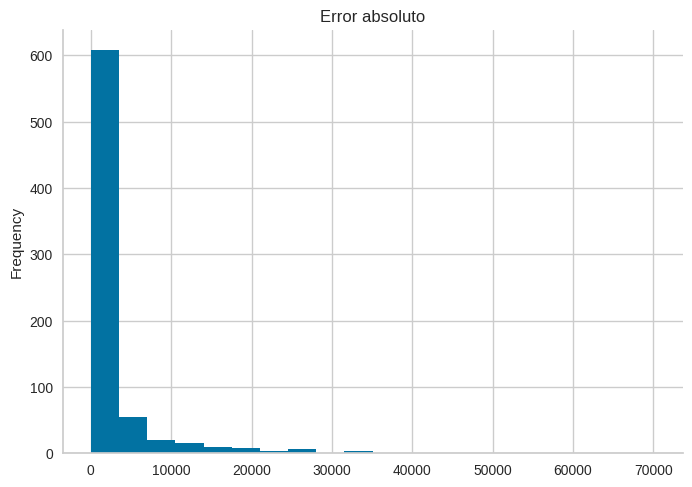

In [ ]:
from matplotlib import pyplot as plt
_df_2['Error absoluto'].plot(kind='hist', bins=20, title='Error absoluto')
plt.gca().spines[['top', 'right',]].set_visible(False)

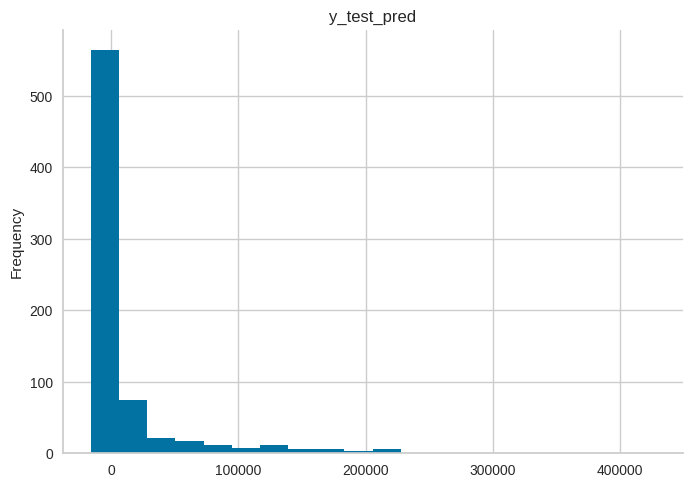

In [ ]:
from matplotlib import pyplot as plt
_df_1['y_test_pred'].plot(kind='hist', bins=20, title='y_test_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

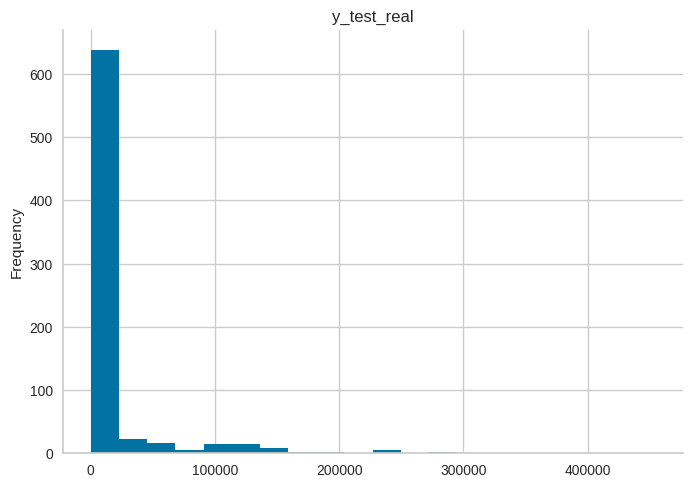

In [ ]:
from matplotlib import pyplot as plt
_df_0['y_test_real'].plot(kind='hist', bins=20, title='y_test_real')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Regularización ElasticNet
from sklearn.linear_model import ElasticNet

# Definir el modelo ElasticNet con parámetros alpha y l1_ratio
# alpha controla la cantidad de regularización
# l1_ratio controla la mezcla entre L1 y L2 (0 = solo L2, 1 = solo L1, valores entre 0 y 1 = combinación de L1 y L2)
elastic_net_reg = ElasticNet(alpha=50, l1_ratio=0.5, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))

In [ ]:
viz = PredictionError(elastic_net_reg).fit(X_poly, y_train)
viz.score(X_poly_test, y_test)
viz.show();

In [ ]:
# l1 = 0.75
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=5, l1_ratio=0.75, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))

In [ ]:
# l1 = 0.9
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=5, l1_ratio=0.9, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))

In [ ]:
# l1 = 0.95
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=5, l1_ratio=0.95, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))

In [ ]:
# l1 = 0.99
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=5, l1_ratio=0.99, max_iter=100, tol=0.1)
elastic_net_reg.fit(X_poly, y_train)
print('Elastic Net Score in test = {} \n \n Elastic Net Score in train = {}'.format(elastic_net_reg.score(X_poly_test, y_test), elastic_net_reg.score(X_poly, y_train)))